In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from numpy.random import seed
from scipy.stats import kstest
from scipy.stats import ks_2samp
np.random.seed(0)
rng = np.random.default_rng()
from sklearn.metrics.pairwise import cosine_similarity
import statistics
from datetime import datetime
from scipy.stats import skew
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import cv2
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Eclipse Dataset ( Whole, Sim & Dissim)

In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe (Eclipse)
df_whole=pd.read_csv('drive/MyDrive/Saner/Dataset/Dataset (Whole-Primary)/eclipse_preproccessed_whole_dataset.csv')
df_whole

,Unnamed: 0,Bug_ID,Product,Component,Status,Resolution,Summary,Changed,Description,Duplicate_Bug_Ids
0,0,518088.0,Web Tools,Web Standard Tools,RESOLVED,INVALID,search widget is not working,2017-06-10 14:42:10,search widget is not working,NaN
1,1,546444.0,z_Archived,PDT,CLOSED,NOT_ECLIPSE,Bug,2020-05-14 11:25:40,created attachment eclipse hello world,NaN
2,2,533893.0,Platform,Website,RESOLVED,INVALID,AntCompareCVSDebugDocIDEIncubatorPMCRelengReso...,2018-04-22 12:23:23,created attachment error in website antcomp...,NaN
3,3,519449.0,PDE,UI,VERIFIED,FIXED,Problem with KEY_NAME,2017-08-03 03:21:28,in product pluginsection recommendedbundles m...,NaN
4,4,519450.0,JDT,UI,RESOLVED,FIXED,Problem with KEY_NAME,2017-07-13 09:43:02,in renametyperefactoring another type the tem...,NaN
...,...,...,...,...,...,...,...,...,...,...
46259,46259,544461.0,Sirius,Server,CLOSED,WONTFIX,Add support for the update of text files,2021-01-06 05:29:02,it should be possible to update a text file us...,NaN
46260,46260,545249.0,JDT,UI,RESOLVED,FIXED,[12] AST View should not show the implicit bre...,2019-05-24 06:06:54,in the case of switchlabeledrule compiler a...,NaN
46261,46261,565646.0,Community,CI-Jenkins,CLOSED,DUPLICATE,help needed in ensuring that https://ci.eclips...,2020-08-14 09:01:13,hi are there any memory cpu usage reports fo...,565863.0
46262,46262,568788.0,z_Archived,Tycho,RESOLVED,FIXED,Support new format .tgz in tycho-p2-director:a...,2021-04-28 16:52:10,created attachment downloads for atom vscode...,NaN


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
df_sim=pd.read_csv('drive/MyDrive/Saner/eclipse_final_sim.csv')
df_sim = df_sim[:120]
df_sim

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
0,183,526539.0,Platform,Ant,CLOSED,DUPLICATE,"Executing an ""ant"" build in a non java project...",0.035231,0.043071,0.082600,2017-10-29 11:05:12,526539.0,since having a build xml file in a pl...,522581.0
1,1752,521057.0,JDT,Core,VERIFIED,DUPLICATE,Internal compiler error: java.lang.NullPointer...,0.065150,0.078524,0.102634,2018-01-02 07:11:59,521057.0,created attachment source code that causes t...,517951.0
2,1914,515976.0,z_Archived,Tycho,CLOSED,DUPLICATE,NPE during execution of org.eclipse.tycho:tych...,0.030835,0.042163,0.062864,2021-04-28 16:51:19,515976.0,we are encountering npe during this execution ...,512326.0
3,2158,516277.0,Orion,Server,CLOSED,DUPLICATE,Exception when launching server,0.030041,0.037288,0.072219,2017-06-21 11:06:14,516277.0,created attachment osgi capture since a...,517672.0
4,2177,515243.0,Platform,IDE,CLOSED,DUPLICATE,Oxygen installation via Eclipse Installer curr...,0.031605,0.038671,0.069164,2017-04-13 06:40:36,515243.0,created attachment log of eclipse installer ...,515213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5835,526533.0,Platform,SWT,CLOSED,DUPLICATE,Eclipse Luna/4.4.2 hangs on start up when usin...,0.032194,0.039099,0.074000,2018-01-25 04:24:45,526533.0,created attachment short video of hanging in...,530267.0
116,5861,526974.0,NatTable,GlazedLists Extension,CLOSED,DUPLICATE,itemsByGroup in GroupByDataLayer don't change ...,0.031490,0.037480,0.065061,2017-11-08 09:33:34,526974.0,i found a problem that the group summary value...,517828.0
117,5914,527953.0,CDT,cdt-indexer,RESOLVED,DUPLICATE,"The ""Index all header variants"" does not work ...",0.039240,0.046017,0.069214,2017-12-03 02:31:54,527953.0,created attachment screenshot showing the is...,315964.0
118,5922,528109.0,JDT,Core,CLOSED,DUPLICATE,Error with Parser#parsePackageDeclaration when...,0.033285,0.039662,0.065595,2017-12-05 08:27:07,528109.0,i m using jdt core with modules when c...,526940.0


In [ ]:
#importing the CSV file of the dataset from google drive into a dataframe
df_dissim=pd.read_csv('drive/MyDrive/Saner/eclipse_final_dis.csv')
df_dissim = df_dissim[: 120]
df_dissim

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
0,157,576714.0,JGit,JGit,CLOSED,DUPLICATE,Upgrade org.apache.sshd:sshd-core to version 2...,0.014263,0.016080,0.027462,2021-10-19 04:47:14,576714.0,affected versions of this package are vulnerab...,574220.0
1,1372,517250.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] Eclipse Oxygen (4.7),0.014451,0.017776,0.028924,2017-06-12 15:52:36,517250.0,we ll use this bug to track the release we re...,517249.0
2,1721,538671.0,Community,CI-Jenkins,CLOSED,DUPLICATE,JIPP for Concurrency Utilities RI,0.013392,0.016903,0.029488,2018-09-10 12:56:59,538671.0,please create a jipp for the eclipse project...,538670.0
3,1839,527762.0,Community,Website,CLOSED,DUPLICATE,Cross site scripting,0.012121,0.013729,0.015358,2017-11-27 04:46:12,527762.0,created attachment eclise screenshot vulenr...,518274.0
4,1843,539770.0,Community,Wiki,CLOSED,DUPLICATE,"The ""allow cookies"" notice appears for every s...",0.011421,0.013845,0.023366,2019-11-21 13:52:27,539770.0,i am prompted to accept cookies with every pag...,552928.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,8741,511532.0,Platform,UI,CLOSED,DUPLICATE,Update org.eclipse.jface.preference.images/pre...,0.007889,0.009733,0.013425,2017-02-02 05:40:11,511532.0,pref dialog title png should be updated to use...,511366.0
116,8822,511669.0,Orion,Node,CLOSED,DUPLICATE,Add the functionality to load additional custo...,0.012993,0.014580,0.025235,2017-02-03 18:44:37,511669.0,using this patch programmers can require modu...,511670.0
117,8849,511704.0,Objectteams,OTJ,CLOSED,DUPLICATE,[otdre] callin for PDELaunchingAdaptor.Launche...,0.012621,0.015416,0.022968,2018-08-09 10:56:55,511704.0,i see the team activated teammanager getteams...,537350.0
118,9036,512015.0,JDT,Core,VERIFIED,DUPLICATE,[inference] Unable to infer lambda return type,0.010226,0.012974,0.026937,2017-03-07 09:24:16,512015.0,both statements and can be compiled with o...,510111.0


## Statistics of dataset (all three for eclipse)

In [ ]:
# Statistics of description for the whole dataset
FEATURES_whole = ['Description']
print('Description of length of the feature columns')
df_whole[FEATURES_whole].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,46263.000000
mean,733.116011
std,1770.464540
min,1.000000
25%,153.000000
50%,312.000000
75%,655.000000
max,51223.000000


In [ ]:
# Statistics of description for the text dataset
FEATURES_sim = ['Description']
print('Description of length of the feature columns')
df_sim[FEATURES_sim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,120.000000
mean,4678.700000
std,6866.650577
min,297.000000
25%,1000.500000
50%,2452.000000
75%,4913.000000
max,49375.000000


In [ ]:
# Statistics of description for the text dataset
FEATURES_dissim = ['Description']
print('Description of length of the feature columns')
df_dissim[FEATURES_dissim].apply(lambda col: col.str.len().describe())

Description of length of the feature columns


,Description
count,120.000000
mean,1484.483333
std,6695.021995
min,9.000000
25%,89.500000
50%,164.500000
75%,317.250000
max,51223.000000


## Skewness & kurt of textually sim & dissim

Skewness:
0.64
kurt:
-0.83
Mean:
0.09
Median:
0.08
Standard Deviation:
0.02


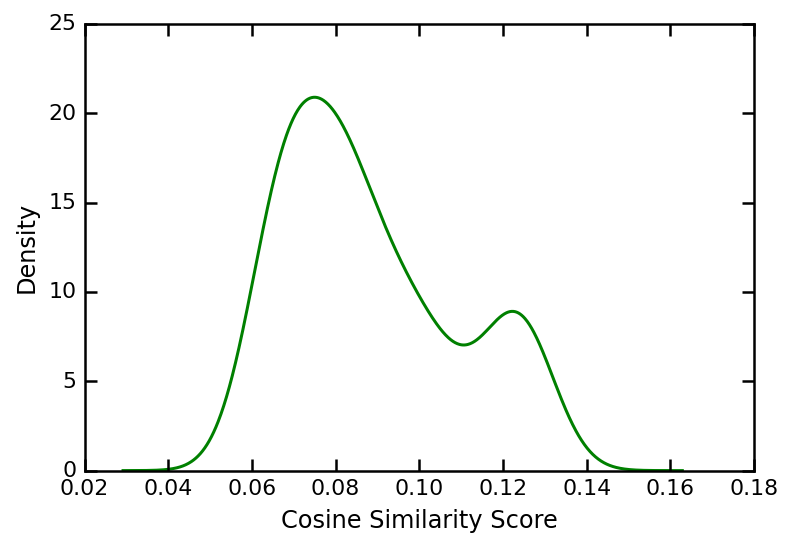

In [ ]:
# Textually similar dataset
import pandas as pds

df_sim_cos = df_sim["Average_Cos_Similarity_Score"];

skewness = df_sim_cos.skew();
kurt = df_sim_cos.kurt();
mean = df_sim_cos.mean()
median = df_sim_cos.median()
std = df_sim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is less than -1 or greater than 1, the distribution is highly skewed.
#Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve.
# Positive kurtosis indicates a relatively peaked distribution.


plt.figure()
df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

Skewness:
-0.7
kurt:
0.03
Mean:
0.02
Median:
0.02
Standard Deviation:
0.01


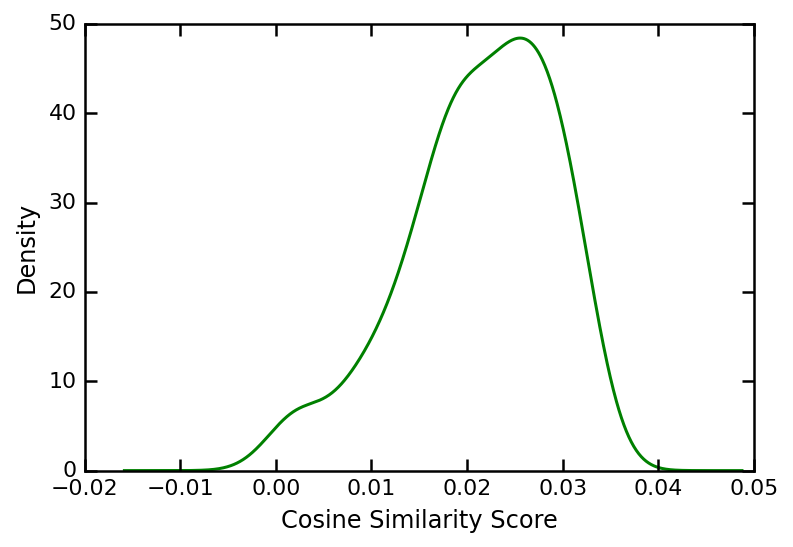

In [ ]:
# Textually dissimilar dataset
import pandas as pds

df_dissim_cos = df_dissim["Average_Cos_Similarity_Score"];

skewness = df_dissim_cos.skew();
kurt = df_dissim_cos.kurt();
mean = df_dissim_cos.mean()
median = df_dissim_cos.median()
std = df_dissim_cos.std()

print("Skewness:");

print(round(skewness,2)); 

print("kurt:");

print(round(kurt,2)); 

print("Mean:");

print(round(mean,2)); 

print("Median:");

print(round(median,2)); 

print("Standard Deviation:");

print(round(std,2)); 

#If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
# Negative kurtosis indicates a relatively flat distribution.
plt.figure()
df_dissim.Average_Cos_Similarity_Score.plot.density(color='green')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Density')
plt.show()

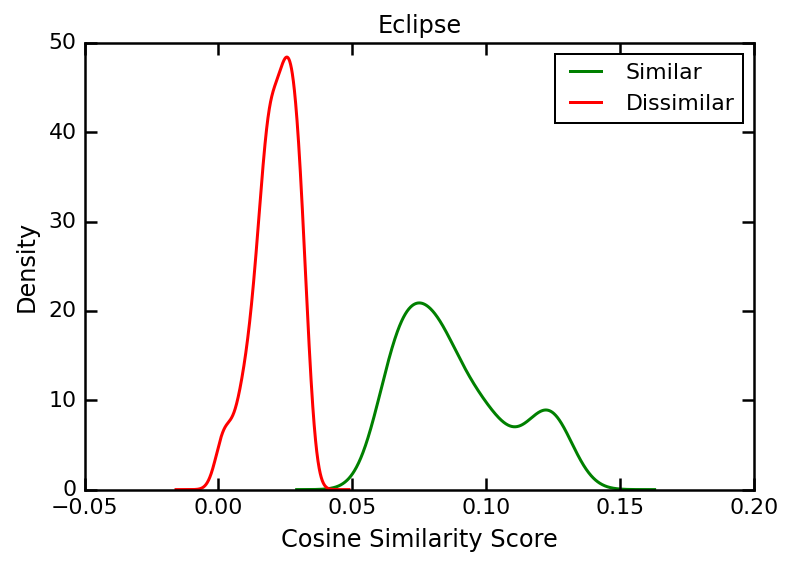

<Figure size 432x288 with 0 Axes>

In [ ]:
# importing package
import matplotlib.pyplot as plt
  
# create data
fig, ax = plt.subplots(2)

# plot lines
ax = plt.axes()
x1= df_sim.Average_Cos_Similarity_Score.plot.density(color='green')
y1= df_dissim.Average_Cos_Similarity_Score.plot.density(color='red')

ax.set_xlabel('Cosine Similarity Score')
ax.set_ylabel('Density')
ax.set_title('Eclipse')

# plt.plot(x1)
# plt.plot(y1)


plt.legend(labels=['Similar', 'Dissimilar'])
plt.show()
plt.savefig('Eclipse dist.png')

## Sorting by cosine value for sim & dis

In [ ]:
# Textually similar
df_sim_sort = df_sim.copy()
df_sim_sort

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
0,183,526539.0,Platform,Ant,CLOSED,DUPLICATE,"Executing an ""ant"" build in a non java project...",0.035231,0.043071,0.082600,2017-10-29 11:05:12,526539.0,since having a build xml file in a pl...,522581.0
1,1752,521057.0,JDT,Core,VERIFIED,DUPLICATE,Internal compiler error: java.lang.NullPointer...,0.065150,0.078524,0.102634,2018-01-02 07:11:59,521057.0,created attachment source code that causes t...,517951.0
2,1914,515976.0,z_Archived,Tycho,CLOSED,DUPLICATE,NPE during execution of org.eclipse.tycho:tych...,0.030835,0.042163,0.062864,2021-04-28 16:51:19,515976.0,we are encountering npe during this execution ...,512326.0
3,2158,516277.0,Orion,Server,CLOSED,DUPLICATE,Exception when launching server,0.030041,0.037288,0.072219,2017-06-21 11:06:14,516277.0,created attachment osgi capture since a...,517672.0
4,2177,515243.0,Platform,IDE,CLOSED,DUPLICATE,Oxygen installation via Eclipse Installer curr...,0.031605,0.038671,0.069164,2017-04-13 06:40:36,515243.0,created attachment log of eclipse installer ...,515213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5835,526533.0,Platform,SWT,CLOSED,DUPLICATE,Eclipse Luna/4.4.2 hangs on start up when usin...,0.032194,0.039099,0.074000,2018-01-25 04:24:45,526533.0,created attachment short video of hanging in...,530267.0
116,5861,526974.0,NatTable,GlazedLists Extension,CLOSED,DUPLICATE,itemsByGroup in GroupByDataLayer don't change ...,0.031490,0.037480,0.065061,2017-11-08 09:33:34,526974.0,i found a problem that the group summary value...,517828.0
117,5914,527953.0,CDT,cdt-indexer,RESOLVED,DUPLICATE,"The ""Index all header variants"" does not work ...",0.039240,0.046017,0.069214,2017-12-03 02:31:54,527953.0,created attachment screenshot showing the is...,315964.0
118,5922,528109.0,JDT,Core,CLOSED,DUPLICATE,Error with Parser#parsePackageDeclaration when...,0.033285,0.039662,0.065595,2017-12-05 08:27:07,528109.0,i m using jdt core with modules when c...,526940.0


In [ ]:
#highest textual similarity in textual similar dataset
df_sim_sort= df_sim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending=False, inplace=False, kind='quicksort')
df_sim_sort.reset_index(drop=True, inplace=True)
df_sim_sort= df_sim_sort[:385]

In [ ]:
df_sim_sort= df_sim_sort.sample(frac=1).reset_index(drop=True)
df_sim_sort['Average_Cos_Similarity_Score'].values.tolist()

In [ ]:
# Textually dissimilar
df_dissim_sort = df_dissim.copy()
df_dissim_sort

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
0,157,576714.0,JGit,JGit,CLOSED,DUPLICATE,Upgrade org.apache.sshd:sshd-core to version 2...,0.014263,0.016080,0.027462,2021-10-19 04:47:14,576714.0,affected versions of this package are vulnerab...,574220.0
1,1372,517250.0,Community,Proposals and Reviews,CLOSED,DUPLICATE,[release] Eclipse Oxygen (4.7),0.014451,0.017776,0.028924,2017-06-12 15:52:36,517250.0,we ll use this bug to track the release we re...,517249.0
2,1721,538671.0,Community,CI-Jenkins,CLOSED,DUPLICATE,JIPP for Concurrency Utilities RI,0.013392,0.016903,0.029488,2018-09-10 12:56:59,538671.0,please create a jipp for the eclipse project...,538670.0
3,1839,527762.0,Community,Website,CLOSED,DUPLICATE,Cross site scripting,0.012121,0.013729,0.015358,2017-11-27 04:46:12,527762.0,created attachment eclise screenshot vulenr...,518274.0
4,1843,539770.0,Community,Wiki,CLOSED,DUPLICATE,"The ""allow cookies"" notice appears for every s...",0.011421,0.013845,0.023366,2019-11-21 13:52:27,539770.0,i am prompted to accept cookies with every pag...,552928.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,8741,511532.0,Platform,UI,CLOSED,DUPLICATE,Update org.eclipse.jface.preference.images/pre...,0.007889,0.009733,0.013425,2017-02-02 05:40:11,511532.0,pref dialog title png should be updated to use...,511366.0
116,8822,511669.0,Orion,Node,CLOSED,DUPLICATE,Add the functionality to load additional custo...,0.012993,0.014580,0.025235,2017-02-03 18:44:37,511669.0,using this patch programmers can require modu...,511670.0
117,8849,511704.0,Objectteams,OTJ,CLOSED,DUPLICATE,[otdre] callin for PDELaunchingAdaptor.Launche...,0.012621,0.015416,0.022968,2018-08-09 10:56:55,511704.0,i see the team activated teammanager getteams...,537350.0
118,9036,512015.0,JDT,Core,VERIFIED,DUPLICATE,[inference] Unable to infer lambda return type,0.010226,0.012974,0.026937,2017-03-07 09:24:16,512015.0,both statements and can be compiled with o...,510111.0


In [ ]:
# Lowest textual similarity in textual dissimilarity dataset
df_dissim_sort= df_dissim_sort.sort_values(by="Average_Cos_Similarity_Score", axis=0, ascending= True, inplace=False, kind='quicksort')
df_dissim_sort= df_dissim_sort[:385]
df_dissim_sort

,Unnamed: 0,Bug ID,Product,Component,Status,Resolution,Summary,Average_Cos_Similarity_Trigram,Average_Cos_Similarity_Bigram,Average_Cos_Similarity_Score,Changed,Bug Id,Description,Duplicate_Bug_Ids
6,1873,523546.0,JDT,Text,CLOSED,DUPLICATE,FREE *TV)))) Cowboys vs Cardinals Live Stream ...,0.000000,0.000000,0.000308,2017-09-26 00:52:12,523546.0,fdsfdsfds,442999.0
56,4828,560515.0,Community,Wiki,CLOSED,DUPLICATE,https://wiki.eclipse.org/ unusable slow,0.001193,0.001271,0.001677,2020-02-25 10:44:06,560515.0,unusable slow,560485.0
11,1989,576924.0,Community,Gerrit,CLOSED,DUPLICATE,Gerrit down,0.001529,0.001673,0.002205,2021-10-28 03:23:33,576924.0,gives bad gateway nginx,576923.0
59,4901,565756.0,Babel,translations,RESOLVED,DUPLICATE,汉化完打不开eclipse,0.006417,0.007053,0.002373,2020-09-01 08:38:17,565756.0,redacted by droy,565380.0
89,7113,558046.0,z_Archived,WindowBuilder,CLOSED,DUPLICATE,Fermeture soudaine d'éclipse,0.003933,0.004442,0.002992,2021-06-04 16:46:07,558046.0,il ya une fermeture soudaine d éclipse lor...,558898.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,5808,526032.0,Platform,SWT,CLOSED,DUPLICATE,[Gtk][Webkit2] WTFCrash,0.013337,0.016894,0.031843,2017-10-31 15:34:10,526032.0,created attachment jvm crash log i m seeing...,522733.0
114,8713,511470.0,CDT,cdt-codan,CLOSED,DUPLICATE,[C++11] 'No return' warning with std::enable_if.,0.015565,0.018007,0.032161,2019-03-24 18:10:06,511470.0,editor shows no return in function returning ...,509751.0
84,6888,548315.0,Platform,Releng,CLOSED,DUPLICATE,Require JdK 13 to be added for running Java 13,0.014872,0.018346,0.032394,2019-06-20 06:28:16,548315.0,from here gerrit beta console error...,547726.0
60,4934,567925.0,Platform,Text,CLOSED,DUPLICATE,[Quicksearch] does not find all occurences wit...,0.014638,0.017483,0.032571,2021-04-26 09:47:22,567925.0,created attachment comparison of both search...,560977.0


In [ ]:
df_dissim_sort= df_dissim_sort.sample(frac=1).reset_index(drop=True)
df_dissim_sort['Average_Cos_Similarity_Score'].values.tolist()